### Lab Part A

1. Generate N Gaussian random numbers and compute mean and std and plot histograms, for N=10,100,1000.  Compare the histograms for all three.  Now try 100k!  What do you notice? 

2. Load IRIS dataset and compute pairwise correlations between features.
    Hint: from scipy import stats
          stats.pearsonr(...)

3. Now standardize each feature and give scatter plot for pairs of columns with highest pairwise correlation. Also give scatter plot for the pair of columns with lowest pairwise correlation.


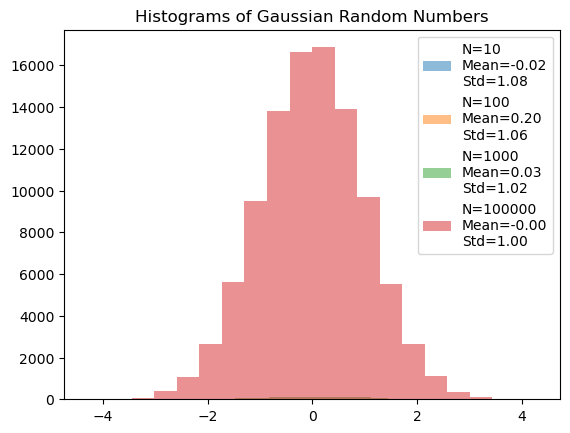

In [48]:
### sterp 1

import numpy as np
import matplotlib.pyplot as plt

# Function to generate Gaussian random numbers, compute mean and std, and plot histogram
def generate_and_plot(N):
    data = np.random.randn(N)
    mean = np.mean(data)
    std = np.std(data)

    plt.hist(data, bins=20, alpha=0.5, label=f'N={N}\nMean={mean:.2f}\nStd={std:.2f}')

# Generate and plot for N=10, 100, 1000, 100000
generate_and_plot(10)
generate_and_plot(100)
generate_and_plot(1000)
generate_and_plot(100000)

plt.legend()
plt.title('Histograms of Gaussian Random Numbers')
plt.show()

/var/folders/rk/0f3hb5qn2hs4scfkrp3q2bcw0000gn/T/ipykernel_7437/3364550410.py:16: DeprecationWarning:

Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.



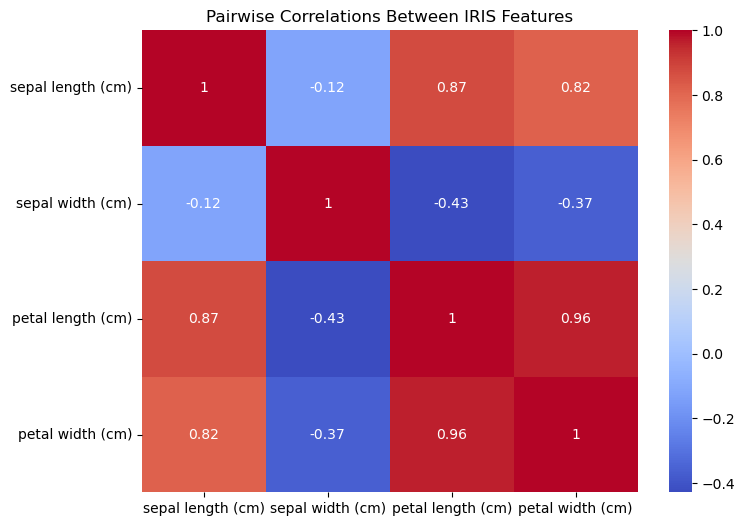

In [49]:
### STEP2 .Load IRIS dataset and compute pairwise correlations between features. Hint: from scipy import stats


import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from scipy.stats import stats

# Load the IRIS dataset
iris = datasets.load_iris()
data = iris.data

# Compute pairwise correlations between features
correlation_matrix = []

for i in range(data.shape[1]):
    row = []
    for j in range(data.shape[1]):
        r, _ = stats.pearsonr(data[:, i], data[:, j])
        row.append(r)
    correlation_matrix.append(row)

correlation_matrix = np.array(correlation_matrix)

# Create a heatmap to visualize the correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', xticklabels=iris.feature_names, yticklabels=iris.feature_names)
plt.title('Pairwise Correlations Between IRIS Features')
plt.show()

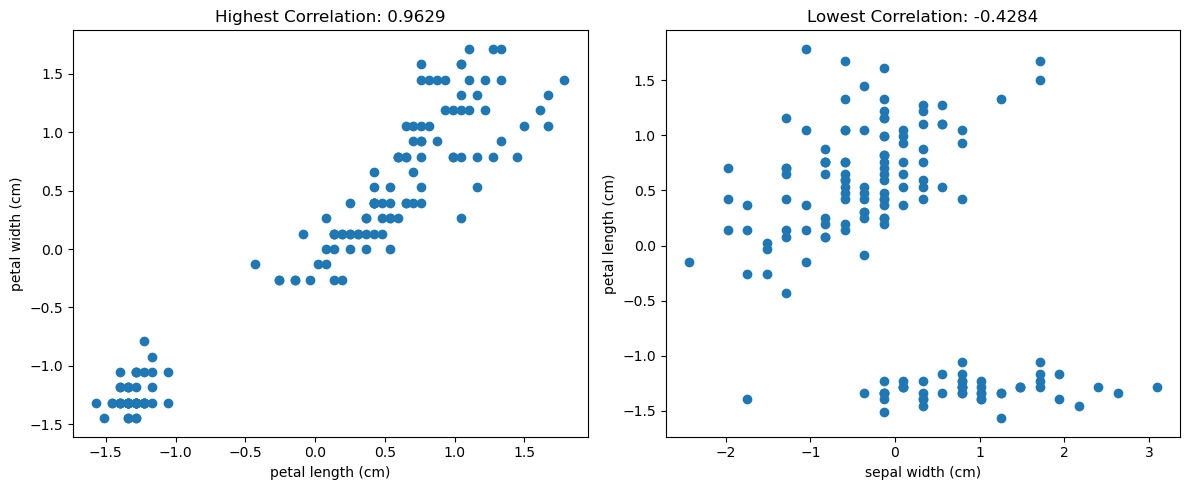

In [42]:
### STEP3.Now standardize each feature and give scatter plot for pairs of columns with highest pairwise correlation. Also give scatter plot for the pair of columns with lowest pairwise correlation. 

import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the IRIS dataset
iris = load_iris()
data = iris.data  # The feature matrix
feature_names = iris.feature_names

# Standardize the features
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data)

# Compute pairwise correlations using Pearson correlation coefficient
correlations = np.corrcoef(data_standardized, rowvar=False)

# Get the indices of the highest and lowest correlations (excluding self-correlations)
np.fill_diagonal(correlations, 0)
max_corr_indices = np.unravel_index(np.argmax(correlations), correlations.shape)
min_corr_indices = np.unravel_index(np.argmin(correlations), correlations.shape)

# Get the feature names for the highest and lowest correlation pairs
highest_corr_pair = (feature_names[max_corr_indices[0]], feature_names[max_corr_indices[1]])
lowest_corr_pair = (feature_names[min_corr_indices[0]], feature_names[min_corr_indices[1]])

# Create scatter plots for the highest and lowest correlation pairs
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for i, (pair, title) in enumerate(zip([highest_corr_pair, lowest_corr_pair], ["Highest Correlation", "Lowest Correlation"])):
    x_index, y_index = [feature_names.index(feature) for feature in pair]
    x_data = data_standardized[:, x_index]
    y_data = data_standardized[:, y_index]
    
    ax = axes[i]
    ax.scatter(x_data, y_data)
    ax.set_xlabel(pair[0])
    ax.set_ylabel(pair[1])
    ax.set_title(f"{title}: {correlations[x_index, y_index]:.4f}")

plt.tight_layout()
plt.show()

### Lab Part B

1. Recall (and download) the UCI Adults Income dataset from HW2.
Find two examples in the course content in Canvas  
Database Details:   
user='new_haven_ds_read'  
password='new_haven_ds_secret_99'  
host='nhds-fall-23.cwroivw0q1rc.us-east-1.rds.amazonaws.com' database='nhds'  
database='nhds'  
  
  
 SQL: sql = 'select * from nhds.uci_adults'  
  
2. Calculate the mean, standard deviation, and variance of the age column in the dataset.
3. Create a histogram with bins of the age column.  Choose a number of bins that you like.
4. Calculate the mean, standard deviation, and variance of the educational_num column in the dataset.
5. Create a histogram with bins of the educational_num column.  Choose a number of bins that you like.

In [5]:
import psycopg2

In [12]:
conn = psycopg2.connect(user='new_haven_ds_read', 
                        password='new_haven_ds_secret_99',
                        host='nhds-fall-23.cwroivw0q1rc.us-east-1.rds.amazonaws.com',
                        database='nhds')
sql = 'select * from nhds.uci_adults'
cursor = conn.cursor()
cursor.execute(sql)
result = cursor.fetchall()
cols = [desc[0] for desc in cursor.description]
df = pd.DataFrame(result,columns=cols)
df.tail()

,age,workclass,fnlwgt,education,educational_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income,id
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,32557
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,32558
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,32559
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,32560
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K,32561


In [15]:
###2. Calculate the mean, standard deviation, and variance of the age column in the dataset.
age_column = df['age']

# Calculate mean, standard deviation, and variance
mean_age = np.mean(age_column)
std_dev_age = np.std(age_column)
variance_age = np.var(age_column)

print("Mean Age:", mean_age)
print("Standard Deviation of Age:", std_dev_age)
print("Variance of Age:", variance_age)

Mean Age: 38.58164675532078
Standard Deviation of Age: 13.640223092304081
Variance of Age: 186.0556860078255


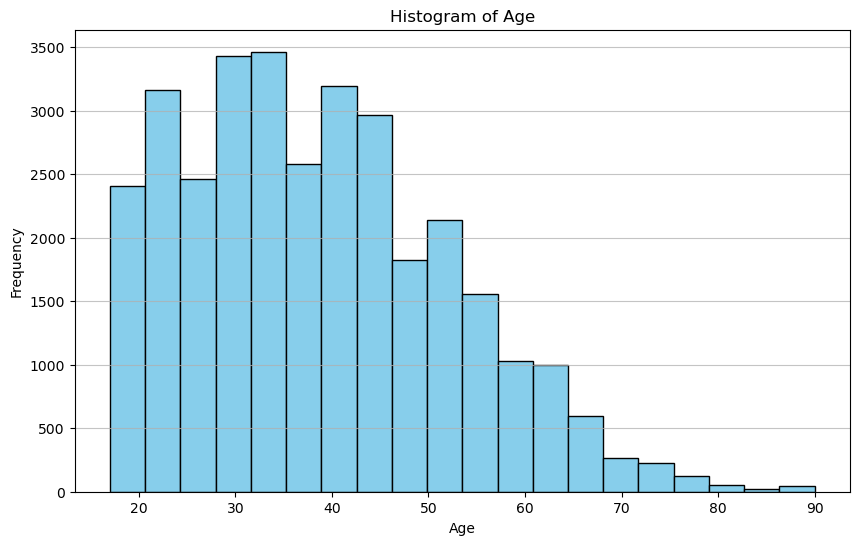

In [17]:
###3. Create a histogram with bins of the age column. Choose a number of bins that you like.
import matplotlib.pyplot as plt

# Plotting histogram
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Show the plot
plt.show()

In [19]:
###4. Calculate the mean, standard deviation, and variance of the educational_num column in the dataset.
mean_educational_num = df['educational_num'].mean()
std_educational_num = df['educational_num'].std()
var_educational_num = df['educational_num'].var()

# Display the results
print(f"Mean: {mean_educational_num}")
print(f"Standard Deviation: {std_educational_num}")
print(f"Variance: {var_educational_num}")

Mean: 10.0806793403151
Standard Deviation: 2.5727203320673406
Variance: 6.618889907032687


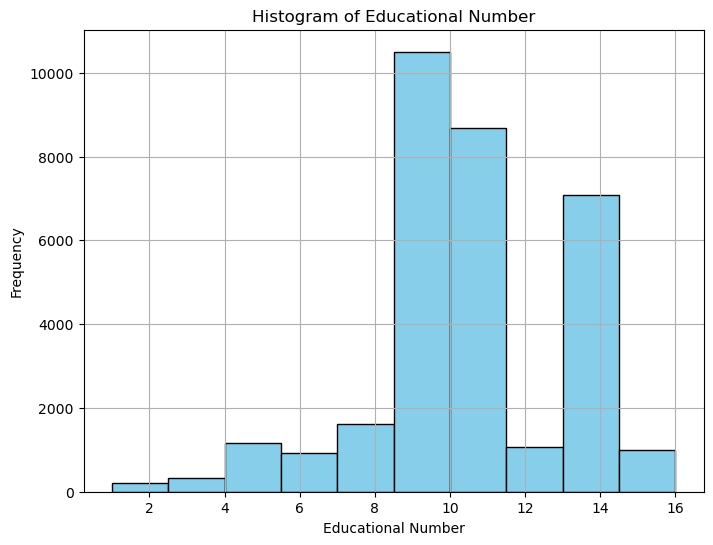

In [20]:
###5.Create a histogram with bins of the educational_num column. Choose a number of bins that you like.

plt.figure(figsize=(8, 6))
plt.hist(df['educational_num'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Educational Number')
plt.xlabel('Educational Number')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Lab Part C
1. Create a DataFrame with the New York Times Covid data as done in the class notes  
2. Plot the number of daily cases in New Haven County.  
3. Add the rolling 7 day mean to your chart.  
4. Which day had the highest number of new cases in New Haven County?  
5. Which month had the highest number of total new cases in New Haven County?  

In [22]:
### Step 1: Create a DataFrame with the New York Times Covid data
import pandas as pd
df_20 = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties-2020.csv', dtype={'fips':'string'}).set_index('date')
df_21 = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties-2021.csv', dtype={'fips':'string'}).set_index('date')
df_22 = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties-2022.csv', dtype={'fips':'string'}).set_index('date')
df_23 = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties-2023.csv', dtype={'fips':'string'}).set_index('date')
df = pd.concat([df_20, df_21, df_22, df_23]).reset_index()
df['date'] = pd.to_datetime(df['date'])
df.tail()

,date,county,state,fips,cases,deaths
3525156,2023-03-23,Sweetwater,Wyoming,56037,12519,139.0
3525157,2023-03-23,Teton,Wyoming,56039,12150,16.0
3525158,2023-03-23,Uinta,Wyoming,56041,6416,43.0
3525159,2023-03-23,Washakie,Wyoming,56043,2700,51.0
3525160,2023-03-23,Weston,Wyoming,56045,1906,23.0


In [50]:
### Step 2: Plot the number of daily cases in New Haven County
import plotly.graph_objects as go
import plotly.express as px

nhc = df[(df['county'] == 'New Haven') & (df['state'] == 'Connecticut')]
fig = go.Figure()

fig.add_trace(go.Bar(
    x=nhc['date'],
    y=nhc['cases'].diff(),
    name='Daily New Cases'
))

fig.update_layout(title='Daily New Cases in New Haven County', xaxis_title='Date', yaxis_title='Number of Cases')
fig.show()

In [24]:
### Step 3: Add the rolling 7-day mean to your chart
fig.add_trace(go.Scatter(
    x=nhc['date'],
    y=nhc['cases'].diff().rolling(7).mean(),
    name='7-Day Rolling Mean',
    mode='lines'
))

fig.update_layout(title='Daily New Cases in New Haven County with 7-Day Rolling Mean', xaxis_title='Date', yaxis_title='Number of Cases')
fig.show()

In [25]:
### Step 4: Which day had the highest number of new cases in New Haven County?
max_cases_day = nhc.loc[nhc['cases'].diff().idxmax(), 'date']
print(f"The day with the highest number of new cases in New Haven County was: {max_cases_day}")

The day with the highest number of new cases in New Haven County was: 2022-01-10 00:00:00


In [32]:
### Step 5: Which month had the highest number of total new cases in New Haven County?
# Calculate monthly new cases
nhc_monthly = nhc.set_index('date').resample('M')['cases'].diff().sum()

# Convert to Series
nhc_monthly_series = pd.Series(nhc_monthly)

# Convert the index to datetime
nhc_monthly_series.index = pd.to_datetime(nhc_monthly_series.index)

# Find the month with the highest number of total new cases
max_cases_month = nhc_monthly_series.idxmax().strftime('%B %Y')
print(f"The month with the highest number of total new cases in New Haven County was: {max_cases_month}")

The month with the highest number of total new cases in New Haven County was: January 1970
